<a href="https://colab.research.google.com/github/RishabhKrAddya/LGMVIP-DataScience/blob/main/Decision_Tree_algorithn_Iris_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**DATASET LINK: https://bit.ly/3kXTdox**



***Importing the require libraries***

In [ ]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt 
import seaborn as sns

***Import the dataset***

In [ ]:
from google.colab import files
uploaded=files.upload()
df=pd.read_csv(r'Iris.csv')

Saving Iris.csv to Iris.csv


In [ ]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


***Data preprocessing***

In [ ]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [ ]:
df.isnull().mean()

Id               0.0
SepalLengthCm    0.0
SepalWidthCm     0.0
PetalLengthCm    0.0
PetalWidthCm     0.0
Species          0.0
dtype: float64

In [ ]:
df=df.drop(columns='Id')
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


***Exploratory Data Analysis***

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
df['Species'].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

***Data Visualization using Graphs and Charts***


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


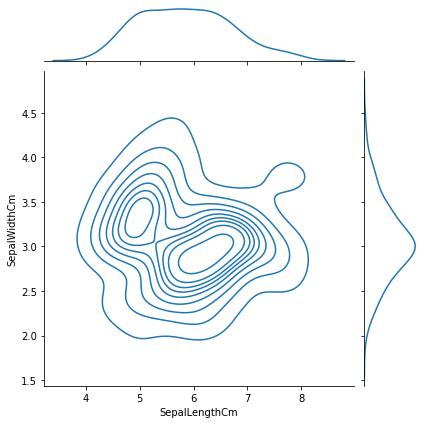

In [ ]:
sns.jointplot('SepalLengthCm','SepalWidthCm',data=df,kind='kde')

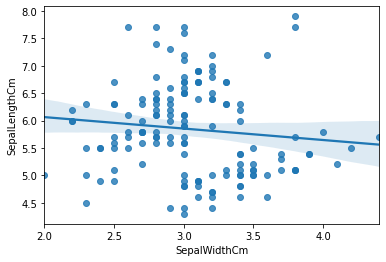

In [ ]:
sns.regplot(x='SepalWidthCm',y='SepalLengthCm',data=df)

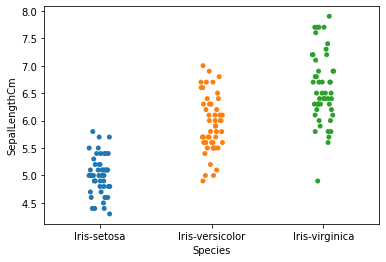

In [ ]:
sns.stripplot(x='Species',y='SepalLengthCm',data=df)

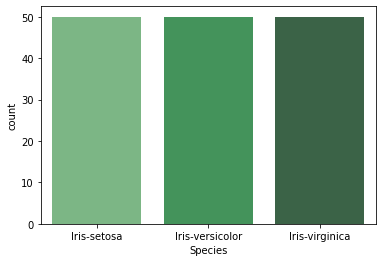

In [ ]:
sns.countplot(x='Species',data=df,palette='Greens_d')

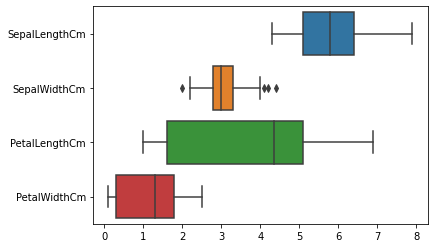

In [ ]:
sns.boxplot(data=df,orient='h')

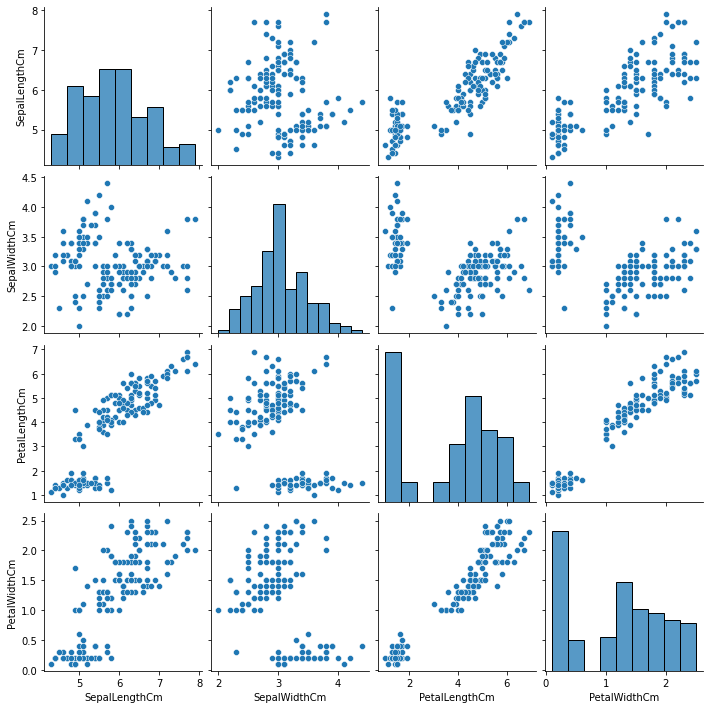

In [ ]:
sns.pairplot(df)

***Correlation Matrix***

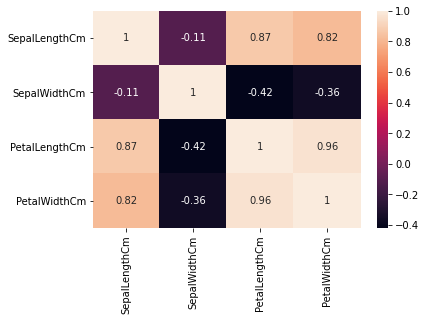

In [ ]:
sns.heatmap(df.corr(),annot=True)

***Splitting the dataset and Apply Machine Learning Algorithm(Decision Tree Classifier)***


In [ ]:
from sklearn.tree import DecisionTreeClassifier #importing the decision tree classifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
train,test=train_test_split(df,test_size=0.2,random_state=0)

In [ ]:
train.shape,test.shape

((120, 6), (30, 6))

In [ ]:
train_x=train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
train_y=train.Species
test_x=train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
test_y=train.Species

In [ ]:
clf=DecisionTreeClassifier()
clf.fit(train_x,train_y)
pred_y=clf.predict(test_x)
print('The accuracy of this model is:', metrics.accuracy_score(pred_y,test_y))

The accuracy of this model is: 1.0


***Confusion Matrix***

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix # imporing confusion matrix
print(confusion_matrix(test_y,pred_y))# checking the model accuracy by using confusion matrix
print(classification_report(test_y,pred_y))

[[39  0  0]
 [ 0 37  0]
 [ 0  0 44]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        39
Iris-versicolor       1.00      1.00      1.00        37
 Iris-virginica       1.00      1.00      1.00        44

       accuracy                           1.00       120
      macro avg       1.00      1.00      1.00       120
   weighted avg       1.00      1.00      1.00       120



***Visualizing the decision tree***

In [ ]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

In [ ]:
feature=df.columns[:4]
feature

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')

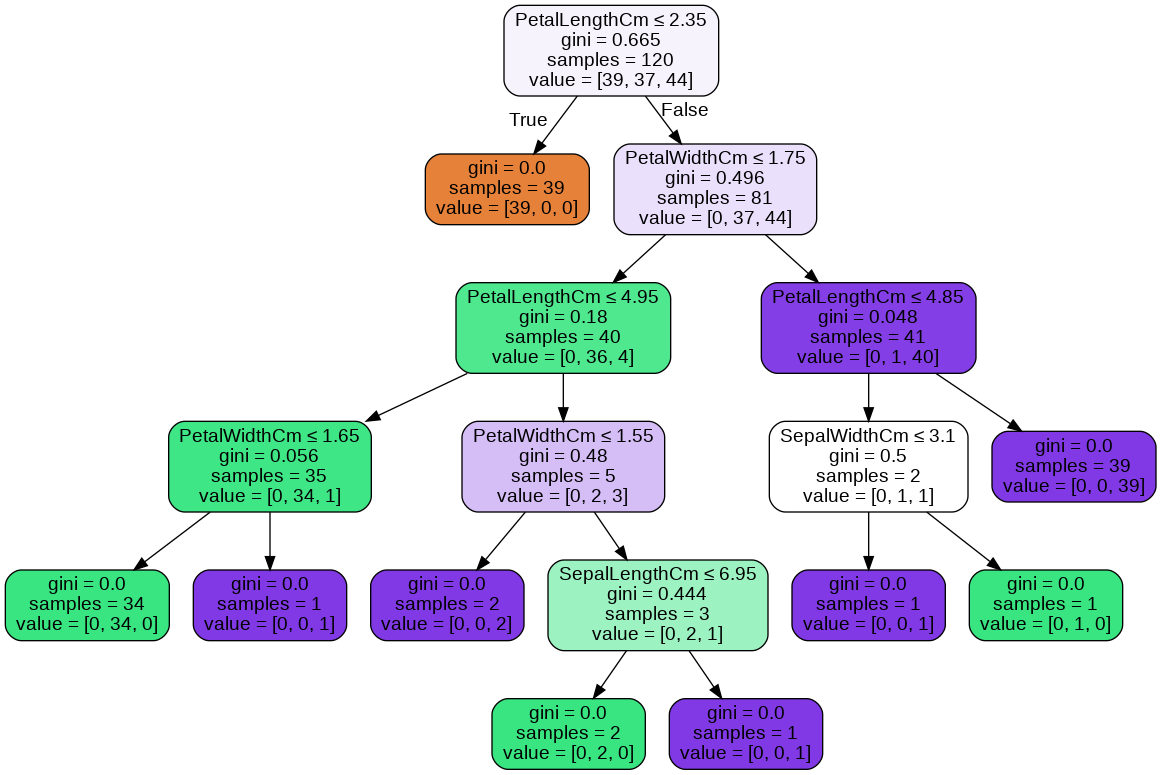

In [ ]:
dot_data=StringIO()
export_graphviz(clf,out_file=dot_data,filled=True,rounded=True,special_characters=True,feature_names=feature)
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('vis.png')
Image(graph.create_png())